## KDJ on Bitcoin


## 策略逻辑：
金叉：K线上穿D线买入

死叉：K线下穿D线卖出

In [1]:
import pandas as pd
import numpy as np
import talib as ta
import quandl


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn')
import matplotlib as mpl

import warnings; warnings.simplefilter('ignore')     #忽略警告信息；

In [2]:
quandl.ApiConfig.api_key='***'

In [3]:
btc= quandl.get('BITFINEX/BTCUSD', start_date = '2020-01-01', end_date = '2020-08-20')
btc.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2020-01-01,7285.1,7185.4,7213.05,7213.1,7213.0,7213.1,2045.343527
2020-01-02,7225.8,6963.0,6989.45,6989.5,6989.4,6989.5,4848.085330
2020-01-03,7444.9,6909.3,7356.95,7356.9,7356.9,7357.0,6653.414357
2020-01-04,7422.0,7297.3,7373.05,7373.0,7373.0,7373.1,4264.090728
2020-01-05,7509.9,7315.8,7346.65,7344.9,7346.6,7346.7,4415.509410


In [4]:
btc['K'], btc['D'] = ta.STOCH(btc['High'].values, btc['Low'].values, btc['Last'].values,
                        fastk_period=5,
                        slowk_period=3,
                        slowk_matype=0,
                        slowd_period=3)

In [5]:
btc.head(10)

,High,Low,Mid,Last,Bid,Ask,Volume,K,D
Date,,,,,,,,,
2020-01-01,7285.1,7185.4,7213.05,7213.100000,7213.0,7213.1,2045.343527,NaN,NaN
2020-01-02,7225.8,6963.0,6989.45,6989.500000,6989.4,6989.5,4848.085330,NaN,NaN
2020-01-03,7444.9,6909.3,7356.95,7356.900000,7356.9,7357.0,6653.414357,NaN,NaN
2020-01-04,7422.0,7297.3,7373.05,7373.000000,7373.0,7373.1,4264.090728,NaN,NaN
2020-01-05,7509.9,7315.8,7346.65,7344.900000,7346.6,7346.7,4415.509410,NaN,NaN
2020-01-06,7785.0,7358.0,7769.75,7768.700000,7768.7,7770.8,8425.221106,NaN,NaN
2020-01-07,8210.3,7741.9,8173.75,8173.600000,8173.6,8173.9,12283.011960,NaN,NaN
2020-01-08,8442.0,7877.6,8052.95,8052.935102,8052.9,8053.0,11730.094530,NaN,NaN
2020-01-09,8036.8,7756.0,7819.55,7819.100000,7819.5,7819.6,4647.509033,69.293610,81.895042


In [6]:
btc = btc.loc[:, ['Last', 'K', 'D']]

In [7]:
btc.tail()

,Last,K,D
Date,,,
2020-08-16,11905.000000,80.367440,69.024632
2020-08-17,12389.000000,88.084830,80.689118
2020-08-18,12058.963936,76.605758,81.686009
2020-08-19,11787.913047,53.562688,72.751092
2020-08-20,11833.677744,31.521668,53.896705


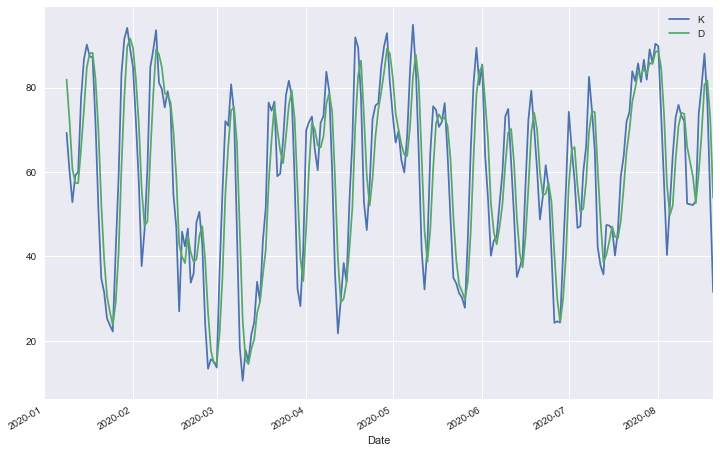

In [8]:
btc[['K', 'D']].plot(figsize = (12,8), grid = True)

In [9]:
btc['return'] = btc['Last']/btc['Last'].shift(1) - 1

In [10]:
btc['cum_return'] = (btc['return']+1).cumprod()

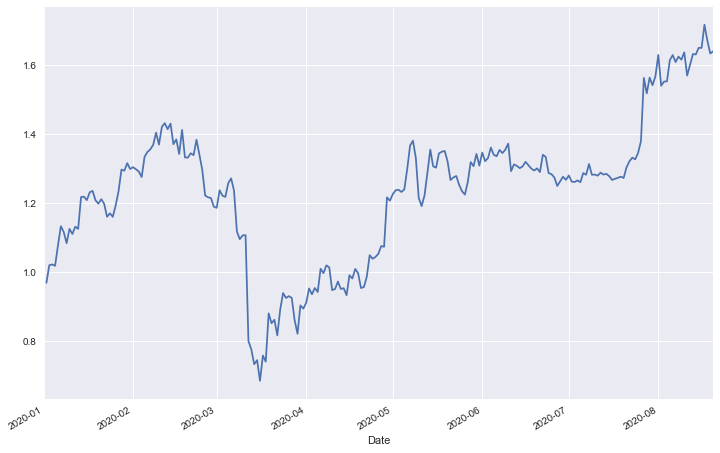

In [11]:
btc['cum_return'].plot(figsize = (12,8), grid = True)

In [13]:
btc['yes_K'] = btc['K'].shift(1)
btc['yes_D'] = btc['D'].shift(1)

In [14]:
btc['position'] = np.where((btc['yes_K']<btc['yes_D']) & (btc['K']>btc['D']), 1, np.nan)
btc['position'] = np.where((btc['yes_K']>btc['yes_D']) & (btc['K']<btc['D']), 0, btc['position'])


In [15]:
btc['position'] = btc['position'].ffill().fillna(0) 

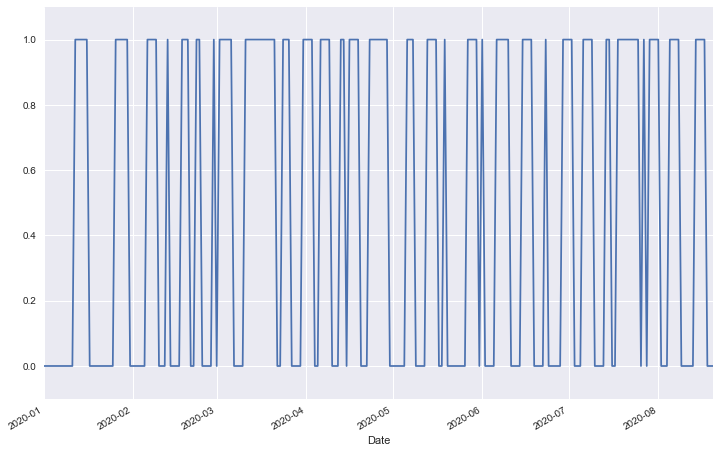

In [16]:
btc['position'].plot(ylim = [-0.1,1.1], figsize = (12,8))

In [17]:
btc['strategy'] = btc['position'].shift(1)*btc['return']

In [18]:
btc['cum_strategy'] = (btc['strategy']+1).cumprod()

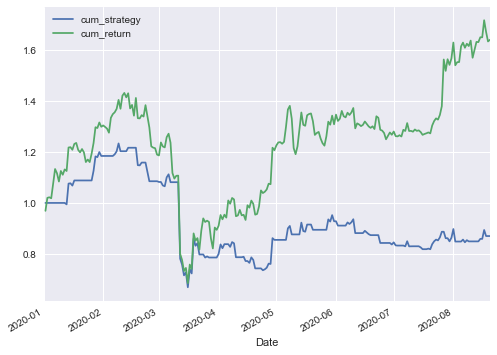

In [19]:
btc[['cum_strategy','cum_return']].plot(figsize = (8,6), grid = True)

In [20]:
btc2= quandl.get('BITFINEX/BTCUSD', start_date = '2018-01-01', end_date = '2018-12-31')
btc2.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2018-01-01,14210.000000,12166.0,13763.5,13769.000000,13757.0,13770.0,43269.641316
2018-01-02,13893.000000,12777.0,13371.0,13375.000000,13366.0,13376.0,29564.886984
2018-01-03,15500.000000,12795.0,14715.0,14723.095748,14712.0,14718.0,56195.098685
2018-01-04,15428.830919,14500.0,15150.5,15134.000000,15150.0,15151.0,38358.561067
2018-01-05,15422.157853,14060.0,15169.0,15175.000000,15163.0,15175.0,46460.131601


In [21]:
btc2['K'], btc2['D'] = ta.STOCH(btc2['High'].values, btc2['Low'].values, btc2['Last'].values,
                        fastk_period=5,
                        slowk_period=3,
                        slowk_matype=0,
                        slowd_period=3)

In [22]:
btc2['yesbef_K'] = btc2['K'].shift(2)
btc2['yesbef_D'] = btc2['D'].shift(2)
btc2['yes_K'] = btc2['K'].shift(1)
btc2['yes_D'] = btc2['D'].shift(1)

In [23]:
btc2['position'] = np.where((btc2['yesbef_K']<btc2['yesbef_D']) & (btc2['yes_K']>btc2['yes_D']), 1, np.nan)
btc2['position'] = np.where((btc2['yesbef_K']>btc2['yesbef_D']) & (btc2['yes_K']<btc2['yes_D']), 0, btc2['position'])


In [24]:
btc2['position'] = btc2['position'].ffill().fillna(0) 

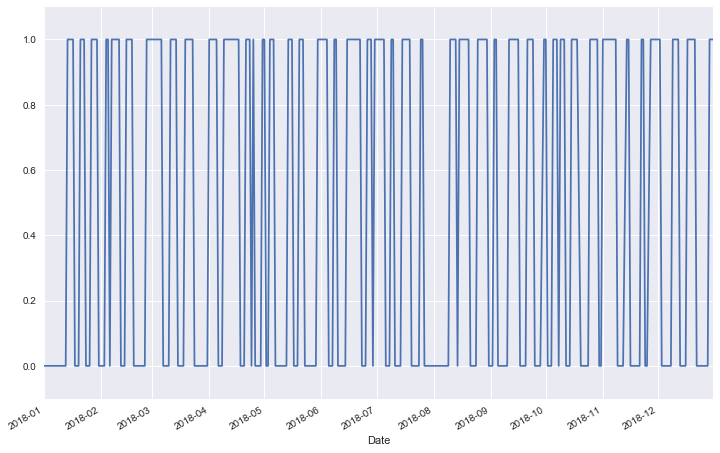

In [25]:
btc2['position'].plot(ylim = [-0.1,1.1], figsize = (12,8))

In [26]:
btc2['return'] = btc2['Last']/btc2['Last'].shift(1) - 1

In [27]:
btc2['cum_return'] = (btc2['return']+1).cumprod()

In [28]:
btc2['strategy'] = btc2['position']*btc2['return']

In [29]:
btc2['cum_strategy'] = (btc2['strategy']+1).cumprod()

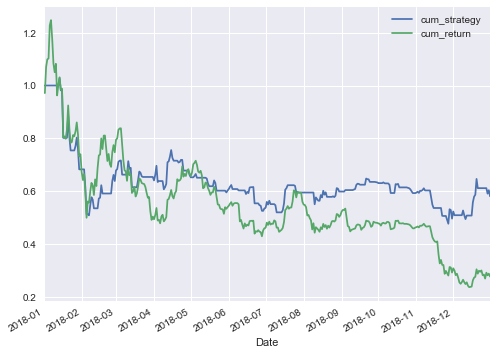

In [30]:
btc2[['cum_strategy','cum_return']].plot(figsize = (8,6), grid = True)